**NETWORK INTRUSION DETECTION SYSTEM**

In [1]:
#Importing Libraries
import pandas as pd
pd.set_option('display.width', 10000)  # Width of the display in characters
pd.set_option('display.max_rows', 100)  # Maximum number of rows to display
pd.set_option('display.max_columns', 100)  # Maximum number of columns to display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics # Importing 'metrics' from sklearn
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical
from sklearn.ensemble import BaggingClassifier
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

*   The code mounts Google Drive to access files and directories from within Google Colab.




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reads a CSV file containing training data from Google Drive
train = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
#Displays the first few rows of the DataFrame.
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [4]:
# Replacing '-' with NaN in column 'Service'
train['service'] = train['service'].replace('-', pd.NA)

# Calculating the mode value of column 'Service' (ignoring NaN values)
mode_value = train['service'].mode(dropna=True)[0]

# Replacing NaN with the mode value in column 'Service'
train['service'] = train['service'].fillna(mode_value)



*   Here, We removed the 'id' and 'label' columns from the data because our target variable and 'label' columns depend on each other.



In [5]:
# Drops the 'id' and 'label' columns from the DataFrame 'train'
train.drop(columns=["id","label"], inplace=True)

In [6]:
# Reads a CSV file containing training data from Google Drive
test = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')
# Displays the first few rows of the DataFrame
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [7]:
# Replacing '-' with NaN in column 'Service'
test['service'] = test['service'].replace('-', pd.NA)

# Calculating the mode value of column 'Service' (ignoring NaN values)
mode_value_test = test['service'].mode(dropna=True)[0]

# Replacing NaN with the mode value in column 'Service'
test['service'] = test['service'].fillna(mode_value_test)

In [8]:
# Drops the 'id' and 'label' columns from the DataFrame 'test'
test.drop(columns=["id","label"], inplace=True)

In [9]:
l = ['Analysis','Backdoor','Shellcode','Worms']
for i in l:
    #data[data.name.isin(list2) == False]
    train = train[train.attack_cat.isin(l) == False]
    test = test[test.attack_cat.isin(l) == False]

* We removed 4 minority classes from our target because they are very low in number.

In [10]:
# Here attack_cat column is the target variable
y_train = train['attack_cat']
y_test  = test['attack_cat']

#**EDA**

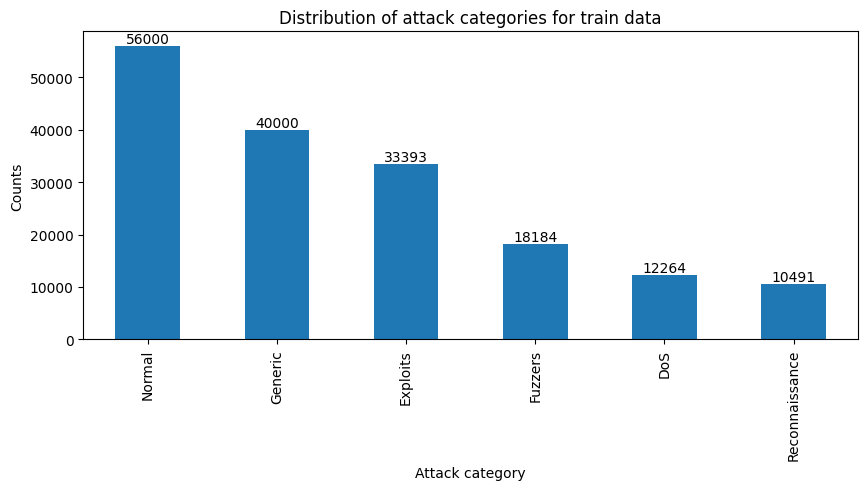

In [11]:
#Visualizes the distribution of attack categories in the training data using a bar plot with labeled bars
plt.figure(figsize=(10,4))
ax = y_train.value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Attack category')
plt.ylabel('Counts')
plt.title('Distribution of attack categories for train data')
plt.show()

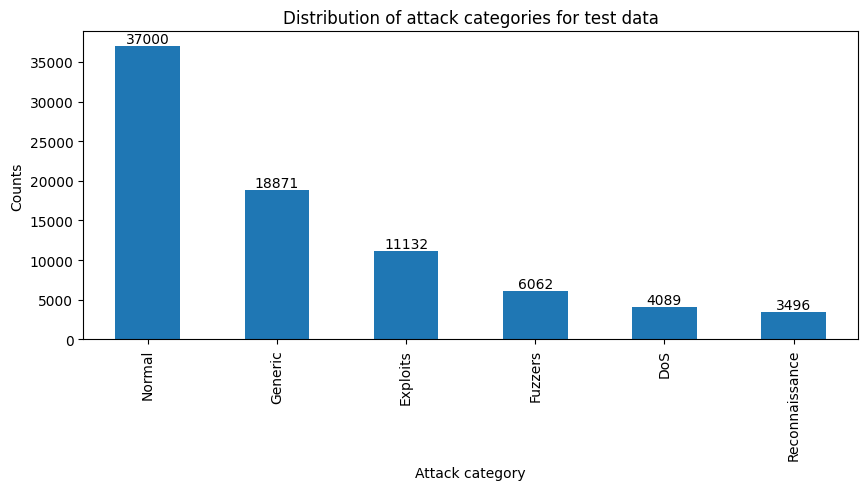

In [12]:
#Visualizes the distribution of attack categories in the test data using a bar plot with labeled bars
plt.figure(figsize=(10,4))
ax = y_test.value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Attack category')
plt.ylabel('Counts')
plt.title('Distribution of attack categories for test data')
plt.show()

* It was evident from the aforementioned graphs that the data we are working with is uneven.

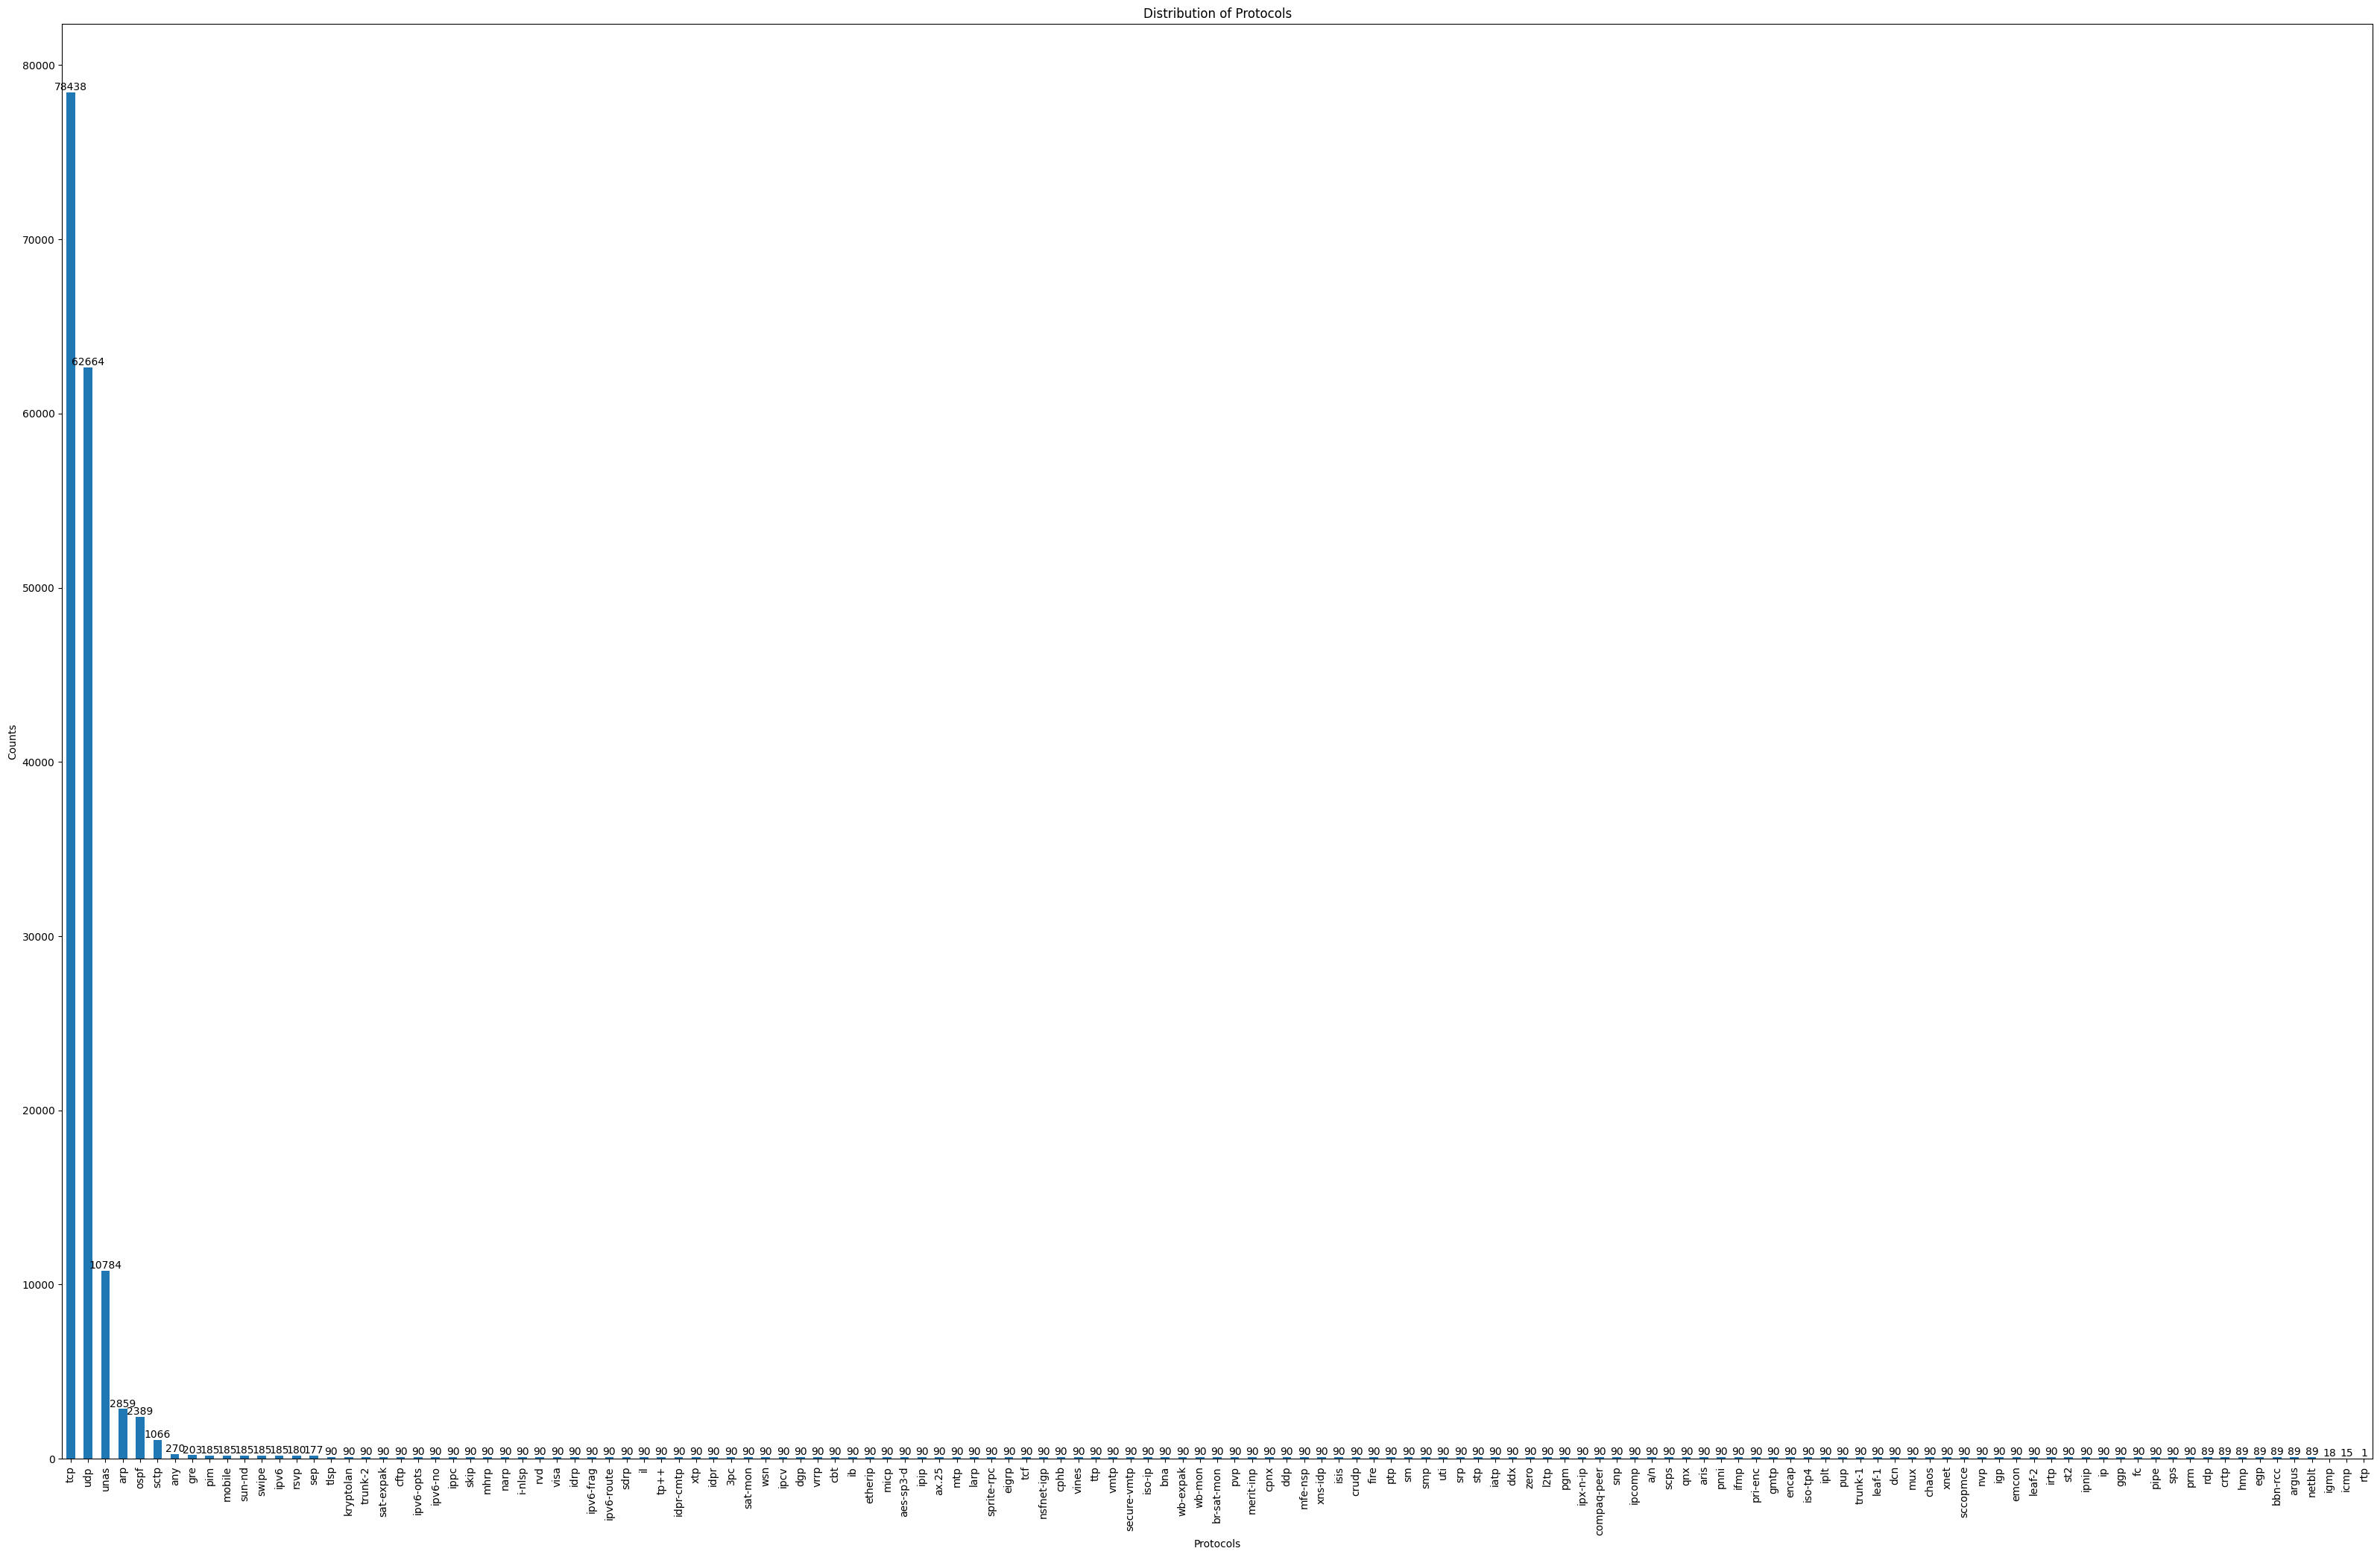

In [13]:
#Visualizes the distribution of Protocols using a bar plot with labeled bars
plt.figure(figsize=(40,25))
ax = train["proto"].value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Protocols')
plt.ylabel('Counts')
plt.title('Distribution of Protocols')
plt.show()

* By the distribution of protocols feature, the Majority of cyber attacks were happend during the tcp, udp protocols.

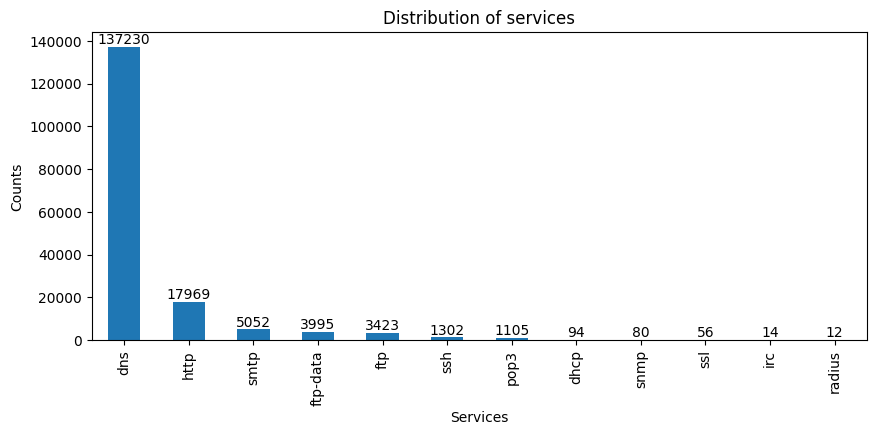

In [14]:
#Visualizes the distribution of Services using a bar plot with labeled bars
plt.figure(figsize=(10,4))
ax = train["service"].value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Services')
plt.ylabel('Counts')
plt.title('Distribution of services')
plt.show()

* here, the Domain Name System is a networking service; at that service, most cyber attacks are happening.

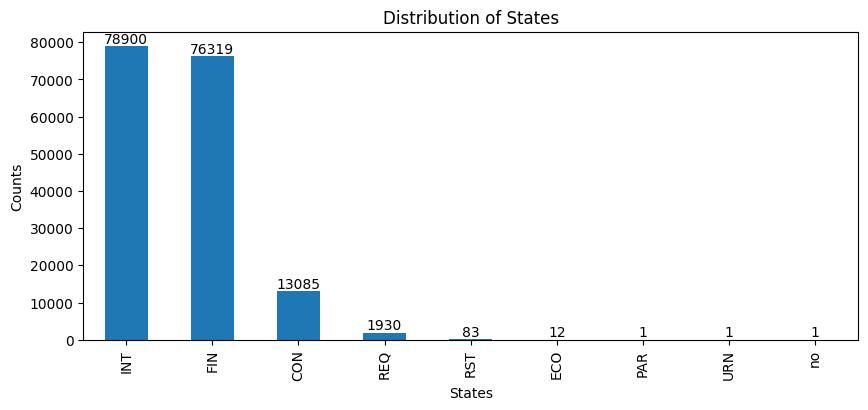

In [15]:
#Visualizes the distribution of States using a bar plot with labeled bars
plt.figure(figsize=(10,4))
ax = train["state"].value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Distribution of States')
plt.show()

* During initiation and finished states, most cyber attacks are happening.

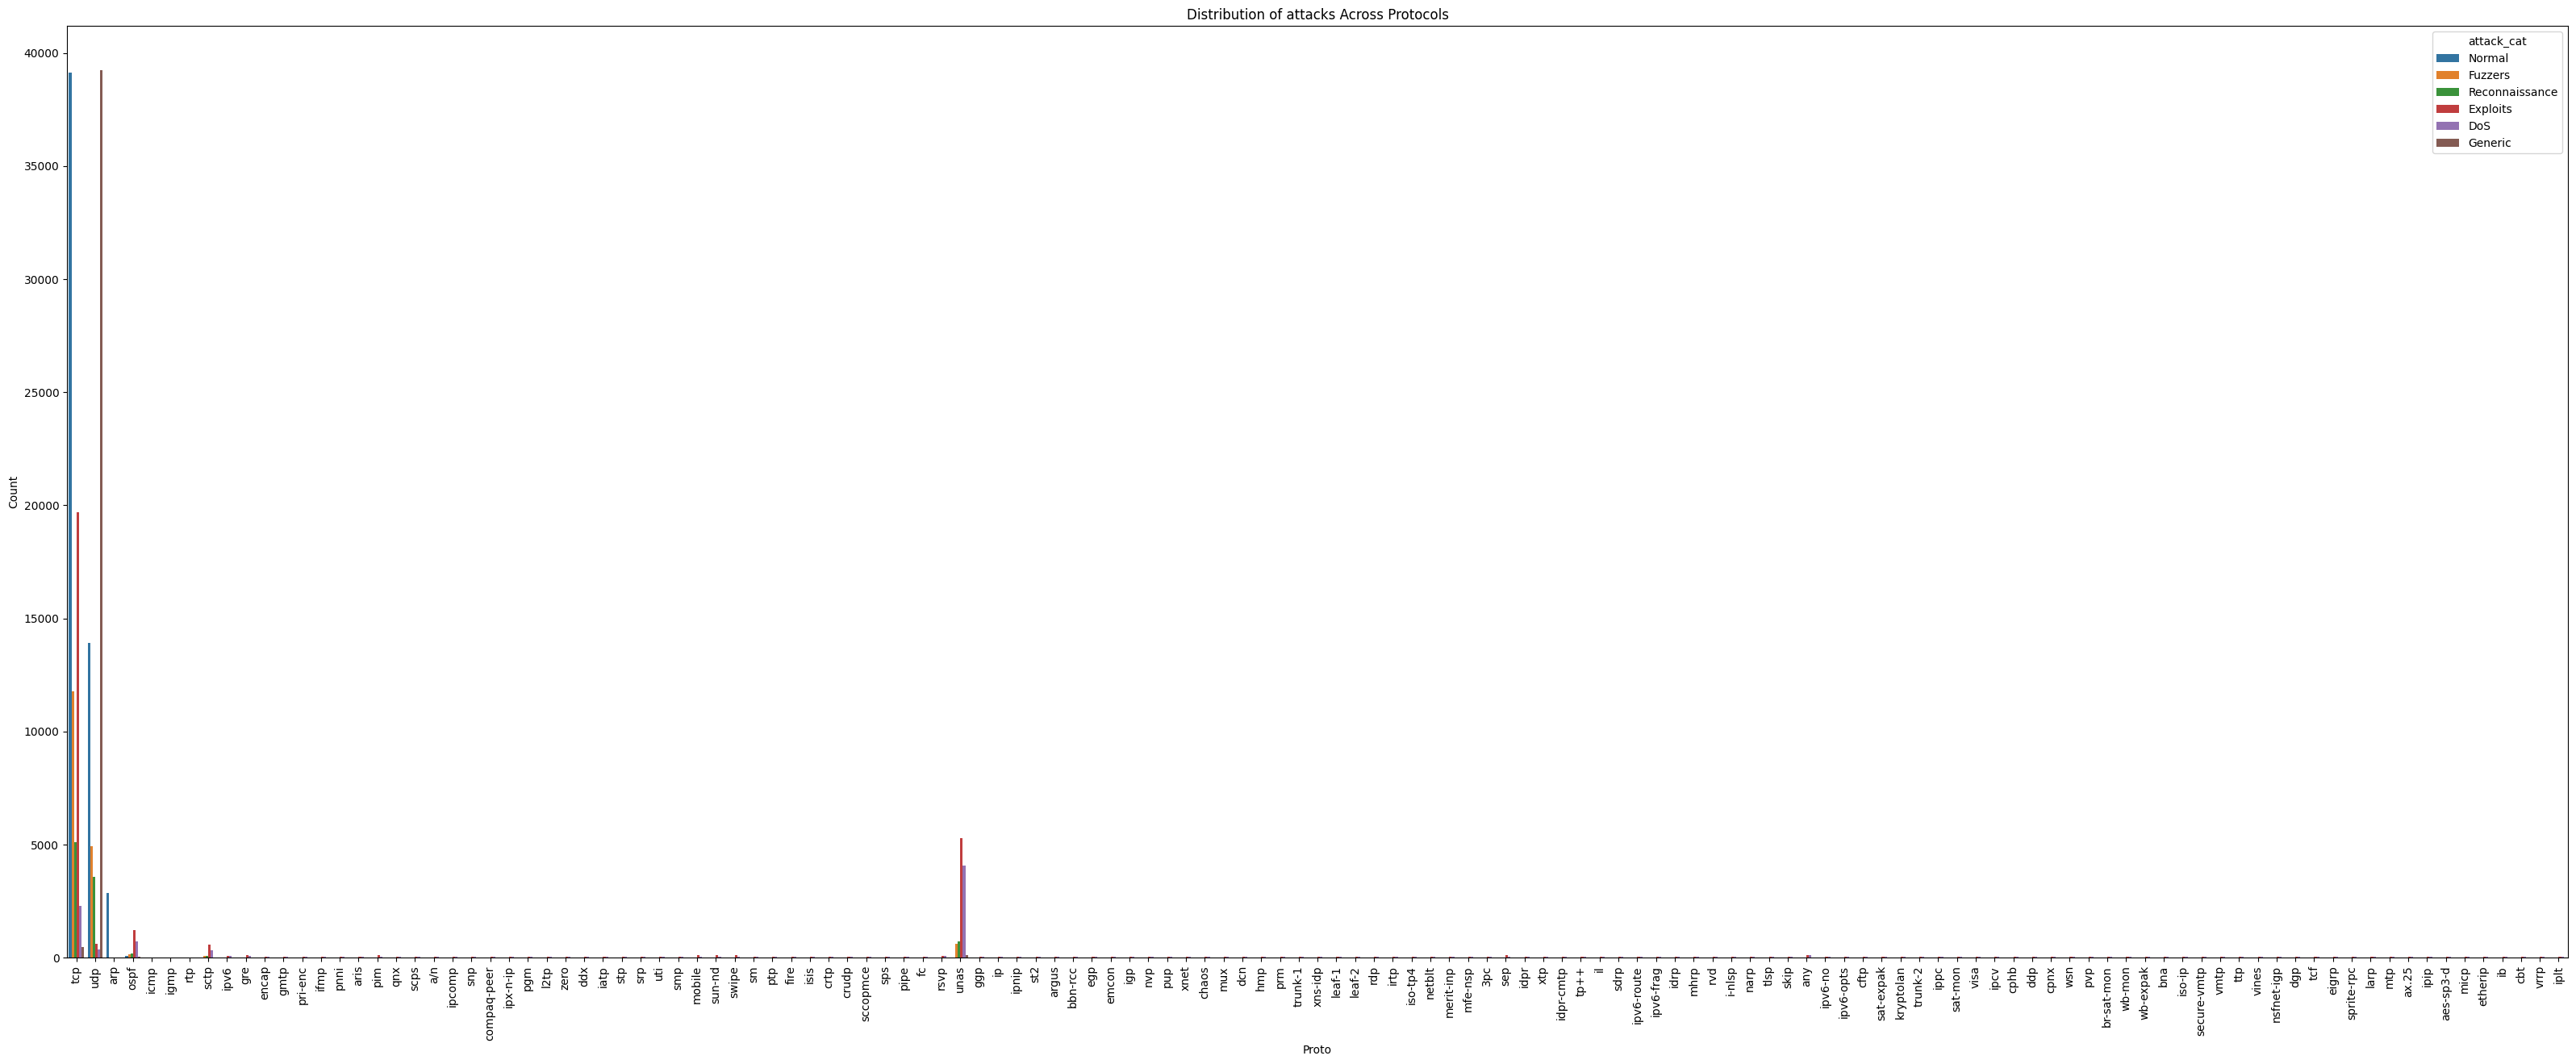

In [16]:
# Set the figure size
plt.figure(figsize=(40, 15))

# Plot the distribution of attacks Across protocols
sns.countplot(x='proto', hue='attack_cat', data=train)

# Set labels and title
plt.xlabel('Proto')
plt.ylabel('Count')
plt.title('Distribution of attacks Across Protocols')
plt.xticks(rotation=90)

# Show the plot
plt.show()



*  By the above graph, we can see that mostly attacks are happening in tcp, and udp protocols.


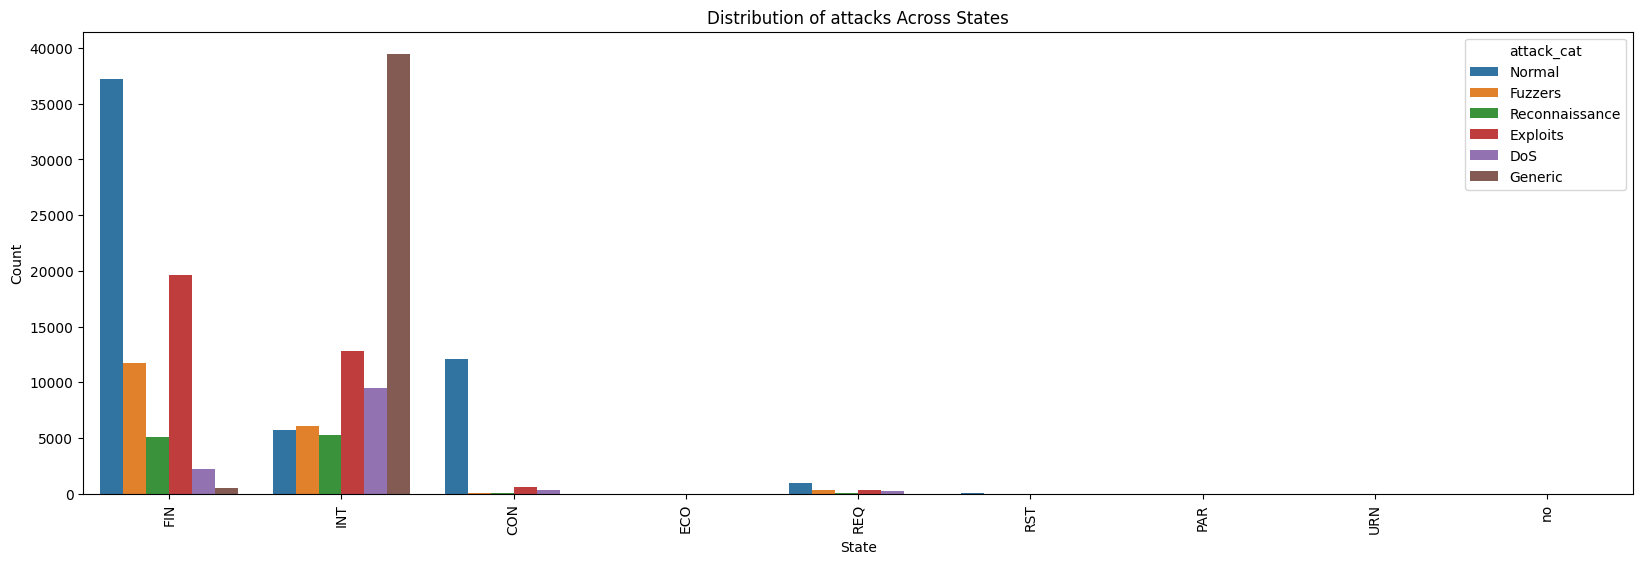

In [17]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the distribution of attacks Across States
sns.countplot(x='state', hue='attack_cat', data=train)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of attacks Across States')
plt.xticks(rotation=90)

# Show the plot
plt.show()



*   From above graph, we can say that attacks are mostly occuring when the state of connections are Finished or Intermediate




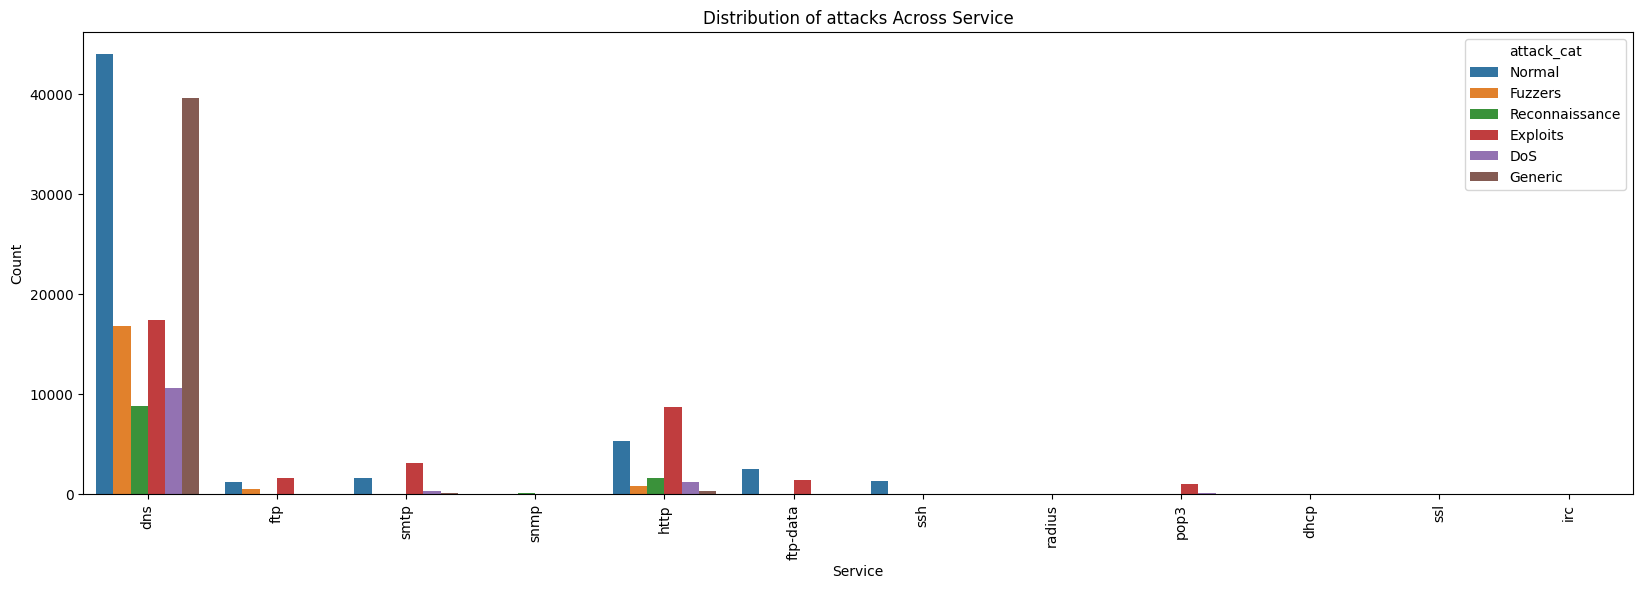

In [18]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the distribution of attacks Across Service
sns.countplot(x='service', hue='attack_cat', data=train)

# Set labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of attacks Across Service')
plt.xticks(rotation=90)

# Show the plot
plt.show()

* By the distribution of attacks across various networking services; Mostly, cyber attacks are happening at dns level.

In [19]:
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])
    test[column] = le.fit_transform(test[column])

In [20]:
# Encoding the target labels using label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.fit_transform(y_test)

In [21]:
# Check the mapping of numerical values to classes
class_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Class Mapping:", class_mapping)

Class Mapping: {0: 'DoS', 1: 'Exploits', 2: 'Fuzzers', 3: 'Generic', 4: 'Normal', 5: 'Reconnaissance'}


#**Feature Engineering**

In [23]:
# Calculating the correlation matrix
corr_matrix = train.corr(numeric_only=True).abs()

# Creating a mask to identify highly correlated features
upper_triangle_mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Identifying highly correlated features
highly_correlated_features = (corr_matrix * upper_triangle_mask).stack()
highly_correlated_features = highly_correlated_features[highly_correlated_features > 0.9]  # Setting correlation threshold here

# Removing one feature from each highly correlated pair
features_to_drop = set()
for pair in highly_correlated_features.index:
    features_to_drop.add(pair[1])  # Dropping the second feature in each pair

# Dropping highly correlated features from the train dataset
train_filtered = train.drop(columns=features_to_drop)

# Dropping highly correlated features from the test dataset
test_filtered = test.drop(columns=features_to_drop)

# Printing the names of features removed
print("Removed highly correlated features:", features_to_drop)

Removed highly correlated features: {'synack', 'ackdat', 'dbytes', 'sloss', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'sbytes', 'ct_srv_dst', 'dloss', 'dwin', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_dst_sport_ltm'}


In [24]:
# Calculate the correlation matrix for numerical features
correlation_matrix = train_filtered.corr()
print(correlation_matrix )

                        dur     proto   service     state     spkts     dpkts      rate      sttl      dttl     sload     dload    sinpkt    dinpkt      sjit      djit      swin     stcpb     dtcpb    tcprtt     smean     dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  is_ftp_login  ct_flw_http_mthd  attack_cat
dur                1.000000 -0.125752  0.028380  0.101007  0.258356  0.185565 -0.119958  0.012506  0.046340 -0.080304 -0.051351  0.080903  0.153520  0.144294  0.159224  0.023884  0.013994  0.015928  0.055158  0.089471  0.026210     0.001410           0.080607   -0.114508      0.181949   -0.087756      0.021357          0.014292   -0.100998
proto             -0.125752  1.000000  0.059608 -0.168394  0.012873  0.025194  0.021814  0.060775  0.107384  0.009201  0.044702 -0.580877 -0.055708  0.015043  0.018132  0.132188  0.103090  0.103146  0.074435  0.041711  0.074074     0.019077           0.005676    0.206547     -0.157408    0.193397      0.017220     

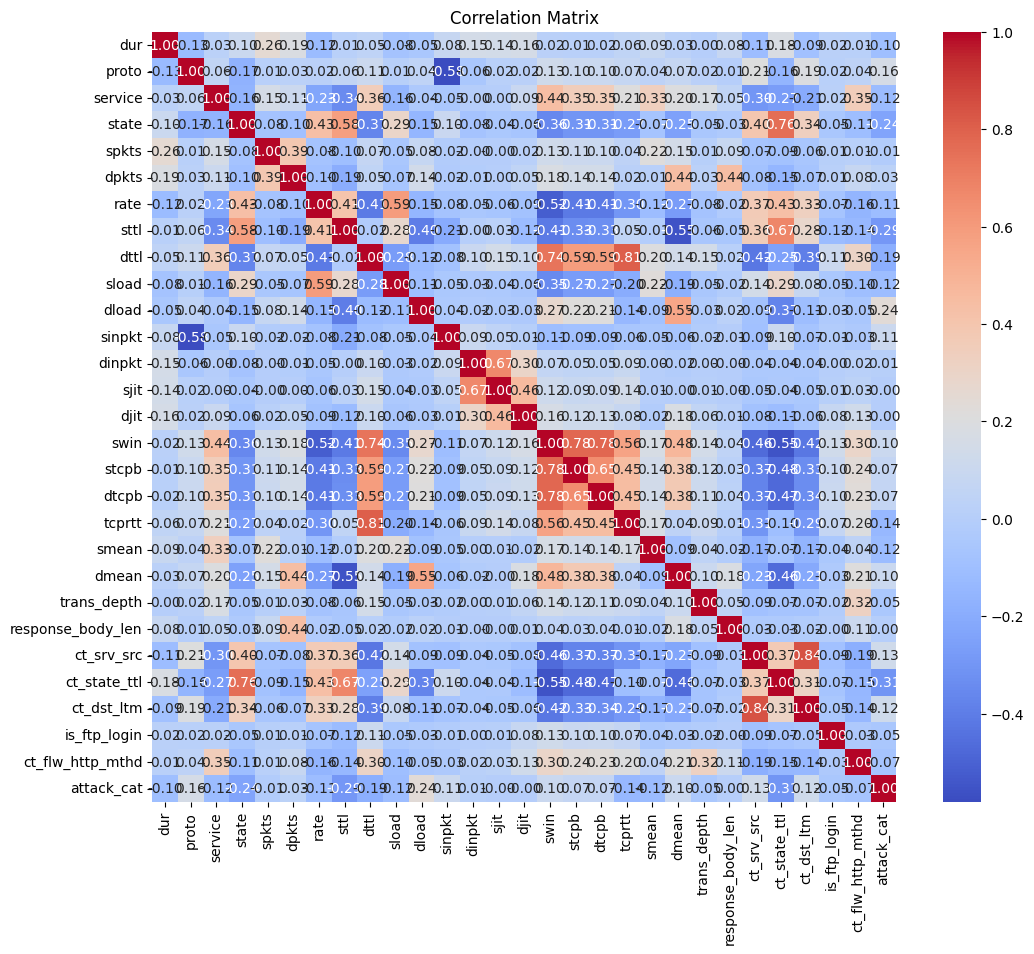

In [25]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* Based on the correlation matrix, we removed 15 dependent features.

In [26]:
#Train
X_train = train_filtered.drop(columns=['attack_cat'])
y_train = y_train_encoded

#Test
X_test = test_filtered.drop(columns=['attack_cat'])
y_test = y_test_encoded

In [27]:
#Train
X_train = train_filtered.drop(columns=['attack_cat'])
y_train = y_train_encoded

#Test
X_test = test_filtered.drop(columns=['attack_cat'])
y_test = y_test_encoded

In [28]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

smean                0.137319
ct_srv_src           0.127317
sttl                 0.089094
ct_dst_ltm           0.073587
ct_state_ttl         0.067754
sload                0.062235
rate                 0.050962
proto                0.044394
dload                0.041899
dmean                0.038424
dur                  0.036164
dttl                 0.029134
tcprtt               0.025912
sinpkt               0.023475
sjit                 0.020800
dinpkt               0.019251
service              0.018599
dpkts                0.017658
spkts                0.015915
djit                 0.015103
stcpb                0.011346
dtcpb                0.010846
state                0.008097
ct_flw_http_mthd     0.004315
response_body_len    0.004172
swin                 0.003630
trans_depth          0.002367
is_ftp_login         0.000230
dtype: float64

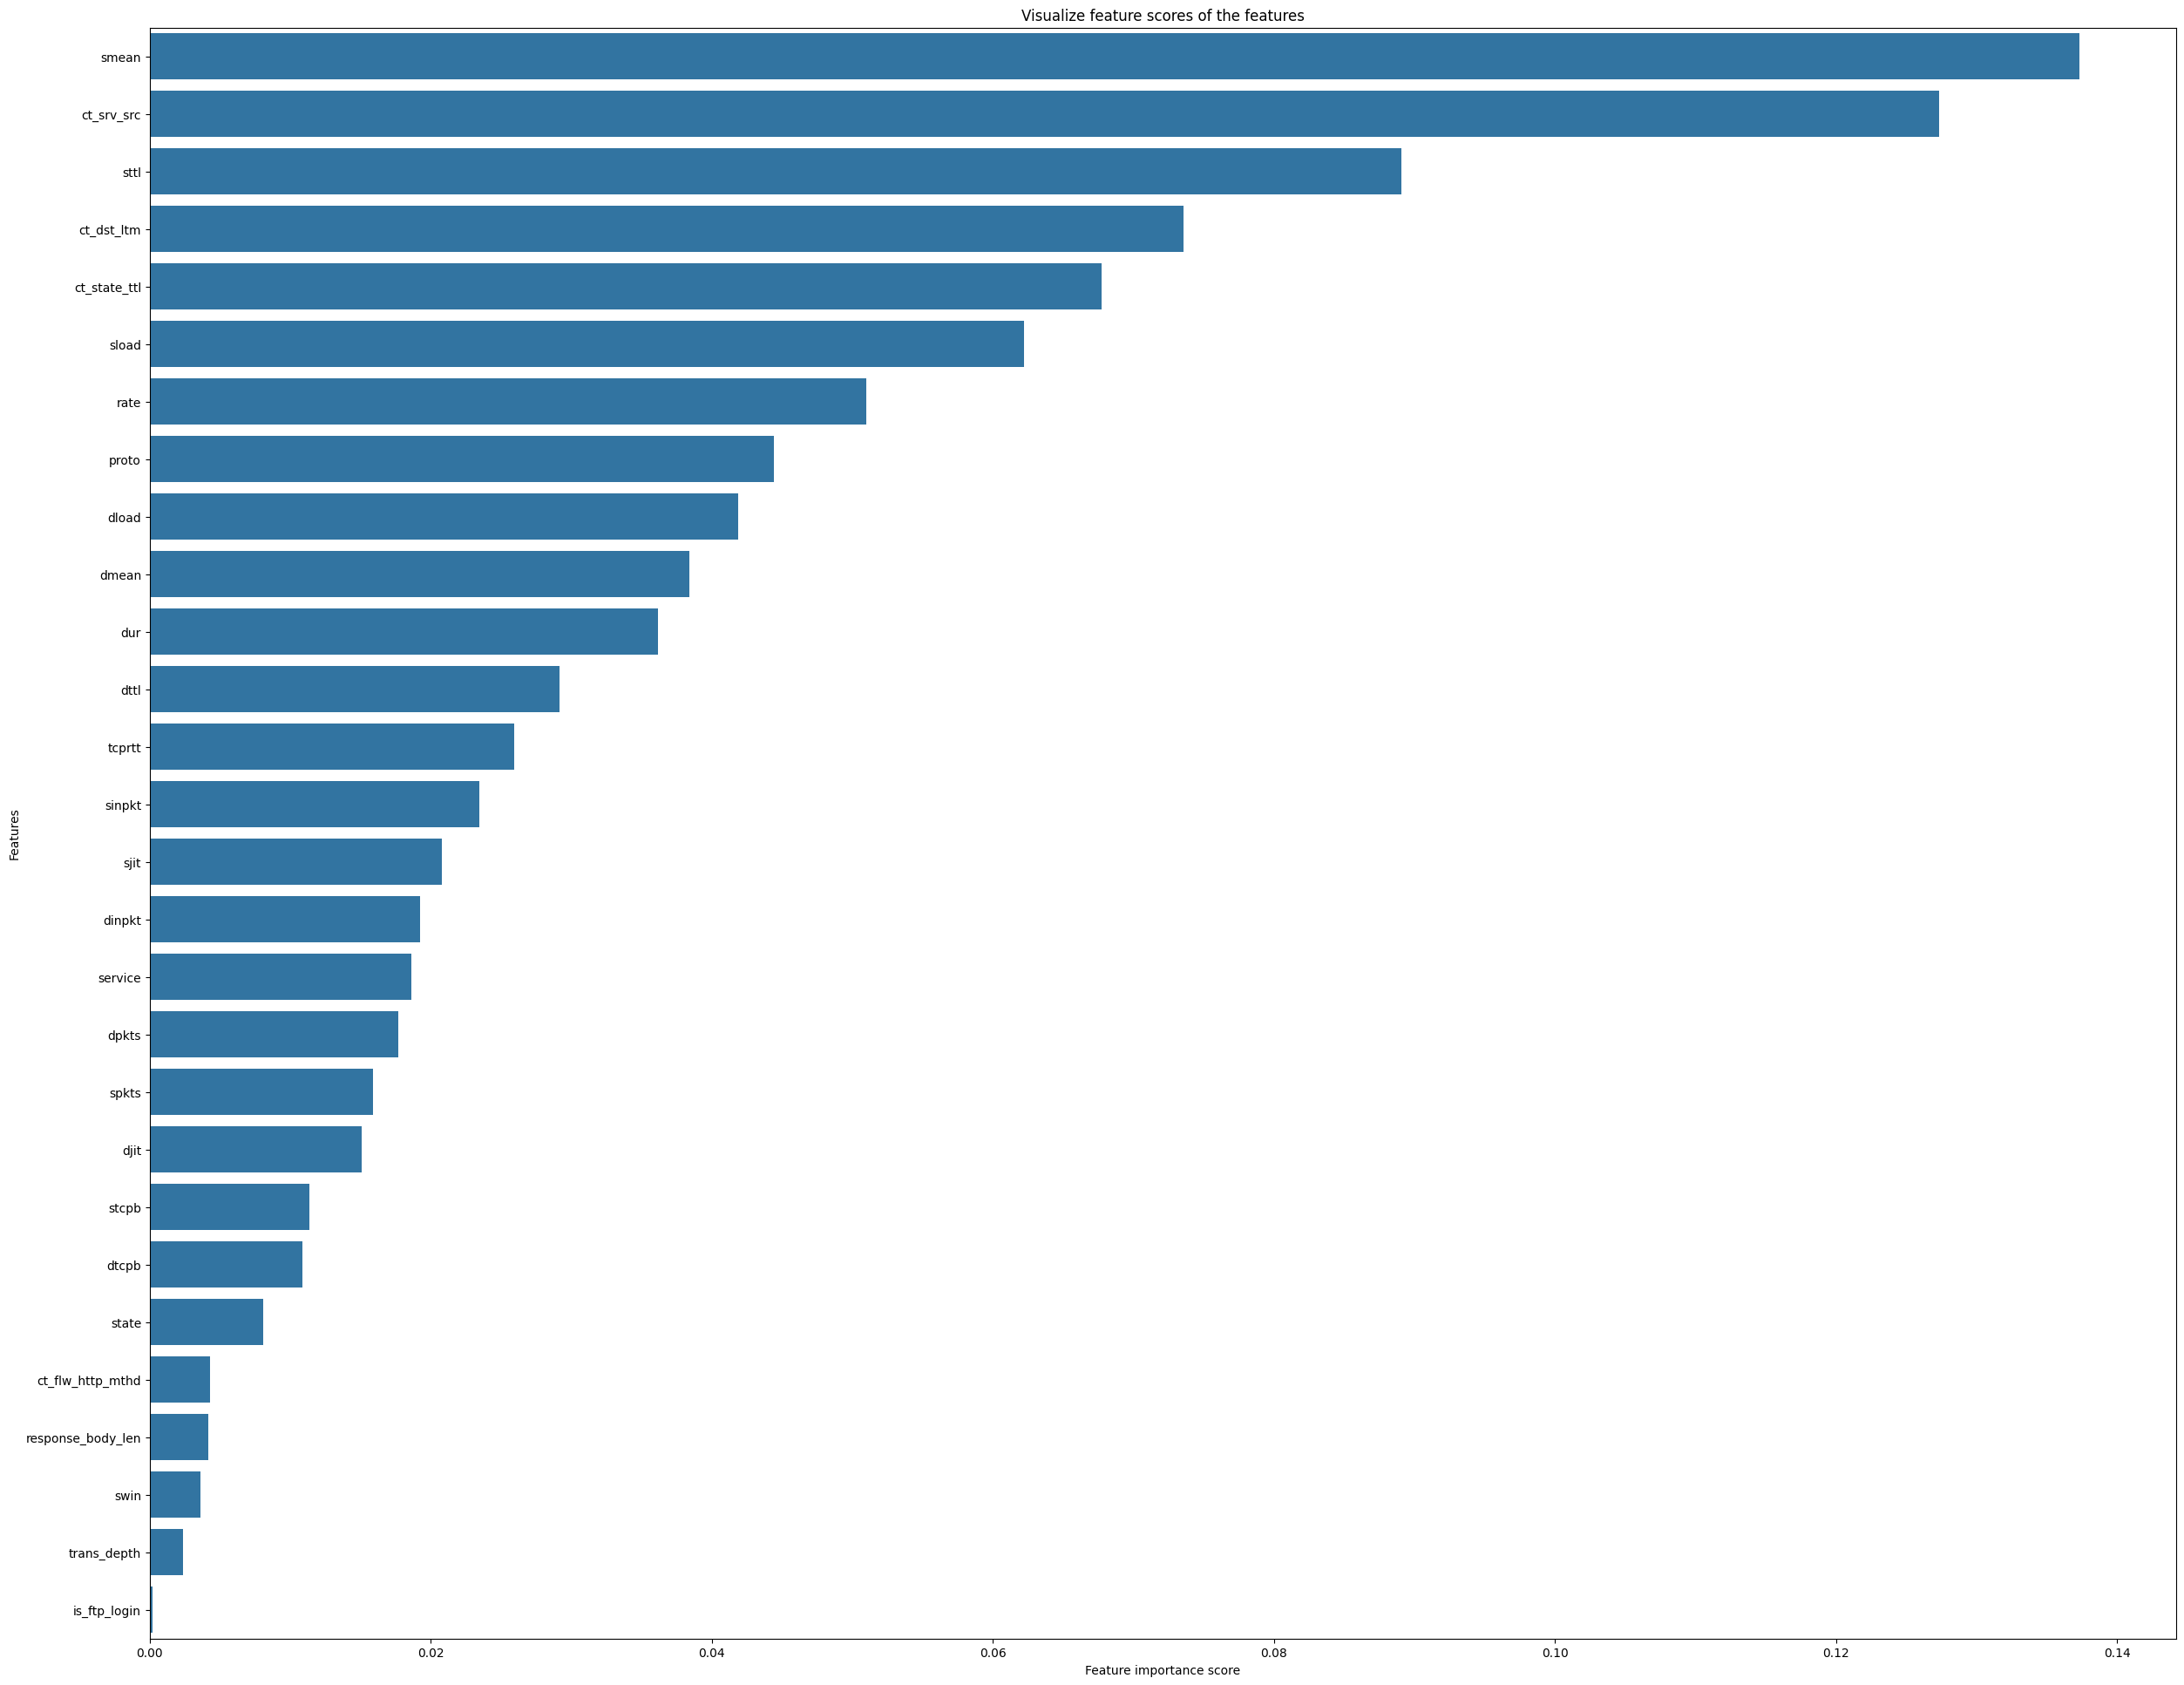

In [30]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
# Build a Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
# Fit the model
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [32]:
# Get feature importances
feature_importances_gbm = gbm.feature_importances_

# Sort feature importances in descending order
indices_gbm = np.argsort(feature_importances_gbm)[::-1]

# Print the feature ranking
print("Feature ranking (Gradient Boosting):")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_gbm[f], feature_importances_gbm[indices_gbm[f]]))

Feature ranking (Gradient Boosting):
1. feature 23 (0.321078)
2. feature 7 (0.319928)
3. feature 19 (0.130137)
4. feature 1 (0.064533)
5. feature 20 (0.032284)
6. feature 8 (0.025023)
7. feature 18 (0.022714)
8. feature 25 (0.017903)
9. feature 2 (0.017110)
10. feature 4 (0.007514)
11. feature 9 (0.006603)
12. feature 24 (0.005337)
13. feature 15 (0.004558)
14. feature 22 (0.003508)
15. feature 6 (0.003281)
16. feature 11 (0.003263)
17. feature 12 (0.003243)
18. feature 5 (0.003084)
19. feature 14 (0.002783)
20. feature 0 (0.001808)
21. feature 10 (0.001617)
22. feature 13 (0.001532)
23. feature 3 (0.000418)
24. feature 21 (0.000289)
25. feature 27 (0.000277)
26. feature 26 (0.000092)
27. feature 17 (0.000044)
28. feature 16 (0.000038)


([<matplotlib.axis.YTick at 0x7b9b9f609000>,
 [Text(0, 0, 'dur'),
  Text(0, 1, 'proto'),
  Text(0, 2, 'service'),
  Text(0, 3, 'state'),
  Text(0, 4, 'spkts'),
  Text(0, 5, 'dpkts'),
  Text(0, 6, 'rate'),
  Text(0, 7, 'sttl'),
  Text(0, 8, 'dttl'),
  Text(0, 9, 'sload'),
  Text(0, 10, 'dload'),
  Text(0, 11, 'sinpkt'),
  Text(0, 12, 'dinpkt'),
  Text(0, 13, 'sjit'),
  Text(0, 14, 'djit'),
  Text(0, 15, 'swin'),
  Text(0, 16, 'stcpb'),
  Text(0, 17, 'dtcpb'),
  Text(0, 18, 'tcprtt'),
  Text(0, 19, 'smean'),
  Text(0, 20, 'dmean'),
  Text(0, 21, 'trans_depth'),
  Text(0, 22, 'response_body_len'),
  Text(0, 23, 'ct_srv_src'),
  Text(0, 24, 'ct_state_ttl'),
  Text(0, 25, 'ct_dst_ltm'),
  Text(0, 26, 'is_ftp_login'),
  Text(0, 27, 'ct_flw_http_mthd')])

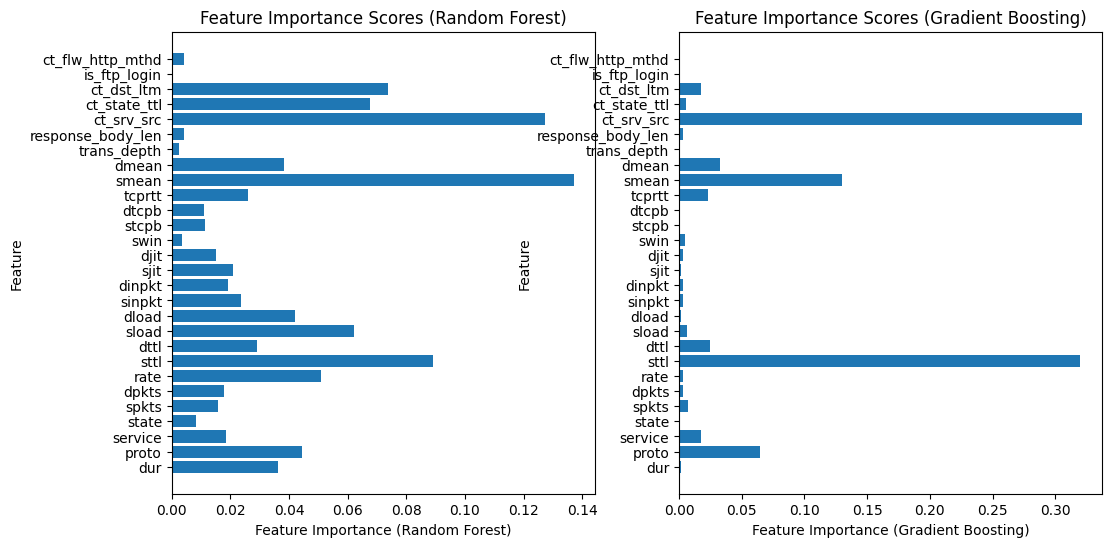

In [33]:
# Plot feature importance for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.xlabel('Feature Importance (Random Forest)')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Random Forest)')
plt.yticks(range(len(X_train.columns)), X_train.columns)
# Plot feature importance for Gradient Boosting
plt.subplot(1, 2, 2)
plt.barh(range(len(gbm.feature_importances_)), gbm.feature_importances_)
plt.xlabel('Feature Importance (Gradient Boosting)')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Gradient Boosting)')
plt.yticks(range(len(X_train.columns)), X_train.columns)

**Potential Columns for this Problem Statement**


*   Smean : This feature represents the mean of the flow packet size transmitted by the source (src) in a network traffic data set.By calculating the mean packet size transmitted by a particular source, you can gain an understanding of the typical packet size distribution associated with that source's activity on the network.
*   ct_srv_src : It tells us the number of connections that involve both the same service (like a type of application or protocol) and the same source address (the device or computer initiating the connection). It's measured within a specific context of the last 100 connections and the time it took for those connections to occur.
*   sttl : It represents the Source to Destination Time to Live (TTL) value in network communication. The TTL value indicates how many hops or routers a packet can pass through before it expires or is discarded.
*   ct_state_ttl : This feature counts the occurrences of different states (like established, closed, etc.) based on specific ranges of values for source/destination time to live (TTL).
*   Sload : "Sload" indicates the rate at which data is sent from the source in bits per second.
*   proto : "proto" refers to the type of protocol used for network transactions. Protocols define the rules and formats for communication between devices on a network.
*   Dload : "Dload" indicates the rate at which data is received by the destination in bits per second.
*   dmeansz : "dmeansz" represents the average size of flow packets transmitted by the destination in a network.
*   dur : "dur" denotes the total duration of a recorded activity in the network traffic data.
*   dttl : "dttl" denotes the time to live value from the destination to the source in a recorded network activity.
*   tcprtt : "tcprtt" stands for TCP connection setup round-trip time, which is the total time taken for the three-way handshake in a TCP connection, comprising the time from sending a SYN packet to receiving an ACK packet and the subsequent ACK+data packet.
*   Sintpkt : "Sintpkt" refers to the interpacket arrival time for the source, measured in milliseconds (mSec). It indicates the time gap between the transmission of consecutive packets originating from the same source.
*   Dintpkt : "Dintpkt" refers to the interpacket arrival time for the destination, measured in milliseconds (mSec). It indicates the time gap between the transmission of consecutive packets received by the same destination device.
*  service : "service" indicates the type of service related to network traffic. It categorizes the traffic based on the specific protocol or application it corresponds to. Common services include HTTP, FTP, SMTP, SSH, DNS, and IRC. If a service is not frequently used, it may be denoted by (-).
*   Dpkts : "Dpkts" indicates the number of packets transmitted from the destination to the source in the network traffic.
*   tcprtt : "tcprtt" stands for TCP connection setup round-trip time, which is the total time taken for the three-way handshake in a TCP connection, comprising the time from sending a SYN packet to receiving an ACK packet and the subsequent ACK+data packet.
*   Sintpkt : "Sintpkt" refers to the interpacket arrival time for the source, measured in milliseconds (mSec). It indicates the time gap between the transmission of consecutive packets originating from the same source.
*   Dintpkt : "Dintpkt" refers to the interpacket arrival time for the destination, measured in milliseconds (mSec). It indicates the time gap between the transmission of consecutive packets received by the same destination device.
*   service : "service" indicates the type of service related to network traffic. It categorizes the traffic based on the specific protocol or application it corresponds to. Common services include HTTP, FTP, SMTP, SSH, DNS, and IRC. If a service is not frequently used, it may be denoted by (-).
*   Dpkts : "Dpkts" indicates the number of packets transmitted from the destination to the source in the network traffic.
*   Spkts : "Spkts" represents the count of packets transmitted from the source to the destination in the network traffic.
*   Djit : "Djit" represents the jitter observed at the destination in milliseconds (mSec). Jitter refers to the variation in delay of received packets.
*   stcpb : "stcpb" represents the base sequence number used in the TCP connection by the source. The sequence number is a crucial aspect of TCP communication, used for ordering and reassembly of packets.
*   dtcpb : "dtcpb" represents the base sequence number used in the TCP connection by the destination. Similar to the source TCP base sequence number, this attribute denotes the initial sequence number chosen by the destination for TCP communication.
*  state : "state" signifies the current state of a protocol and its dependent protocol. It provides information about the status of the connection or communication process.
*   ct_flw_http_mthd : This attribute indicates the number of flows that contain HTTP methods such as GET and POST in the HTTP service. It counts the occurrences of these methods within the captured network traffic.
*   swin : This attribute represents the TCP window advertisement value from the source. In TCP (Transmission Control Protocol), the window size is an important parameter that determines the amount of data a sender can transmit before receiving an acknowledgment from the receiver. The window size is dynamically adjusted during a TCP session based on network conditions, buffer availability, and congestion control mechanisms.
*   trans_depth : This attribute indicates the depth of pipelined HTTP request/response transactions within a connection. In HTTP pipelining, multiple requests are sent on a single TCP connection without waiting for each response before sending the next request. The trans_depth attribute tracks how deeply pipelined the transactions are within the connection.
*   is_ftp_login : This attribute indicates whether the FTP session is accessed using a username and password. If the session requires authentication with a username and password, the value is 1; otherwise, if no authentication is required or provided, the value is 0.

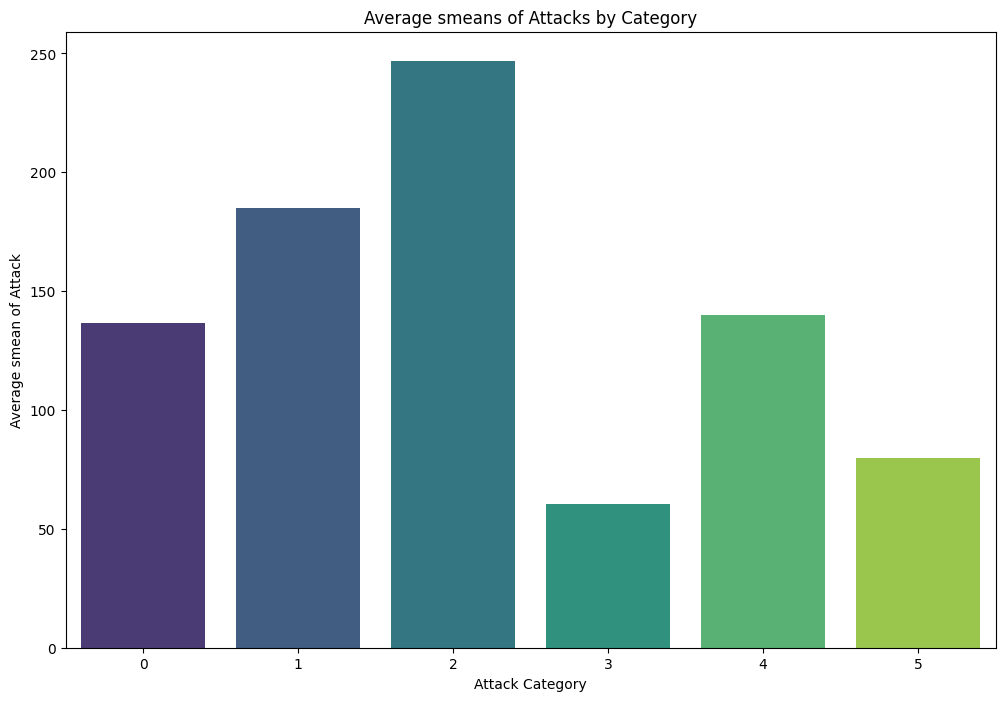

In [34]:
# Assuming 'train_filtered' is our DataFrame and 'attack_cat' and 'smean' are columns in it
actual_duration_avg_attack = train_filtered.groupby('attack_cat')['smean'].mean().sort_values().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the average duration of attacks for each attack category
sns.barplot(x='attack_cat', y='smean', data=actual_duration_avg_attack, palette='viridis')

# Set labels and title
plt.xlabel('Attack Category')
plt.ylabel('Average smean of Attack')
plt.title('Average smeans of Attacks by Category')

# Show the plot
plt.show()

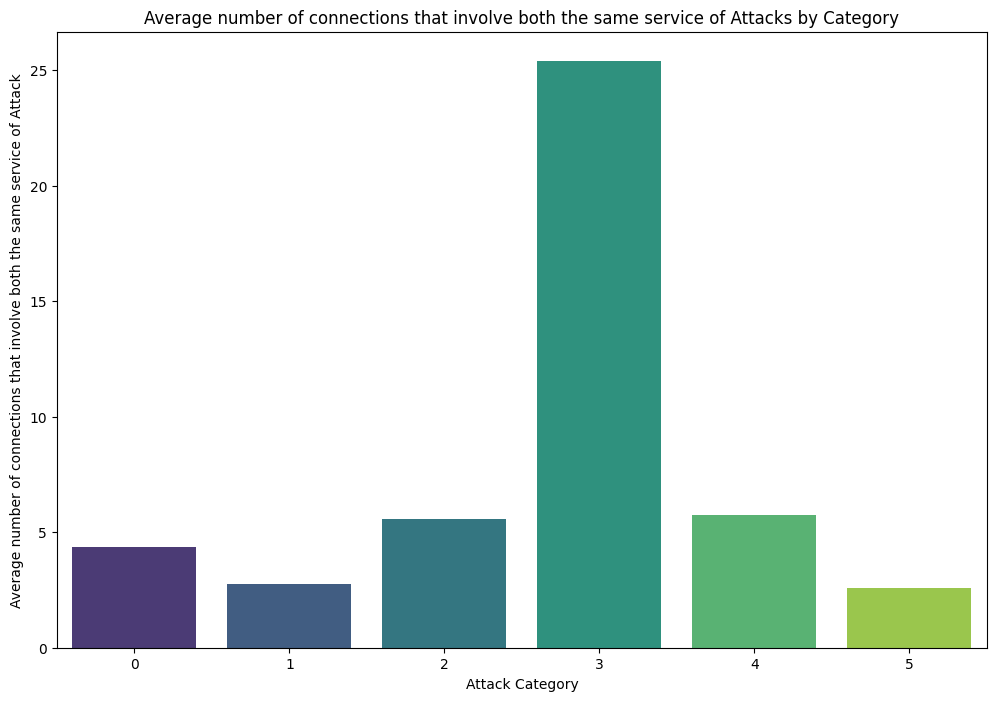

In [35]:
# Assuming 'train_filtered' is our DataFrame and 'attack_cat' and 'ct_srv_src' are columns in it
actual_duration_avg_attack = train_filtered.groupby('attack_cat')['ct_srv_src'].mean().sort_values().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the average duration of attacks for each attack category
sns.barplot(x='attack_cat', y='ct_srv_src', data=actual_duration_avg_attack, palette='viridis')

# Set labels and title
plt.xlabel('Attack Category')
plt.ylabel('Average number of connections that involve both the same service of Attack')
plt.title('Average number of connections that involve both the same service of Attacks by Category')

# Show the plot
plt.show()

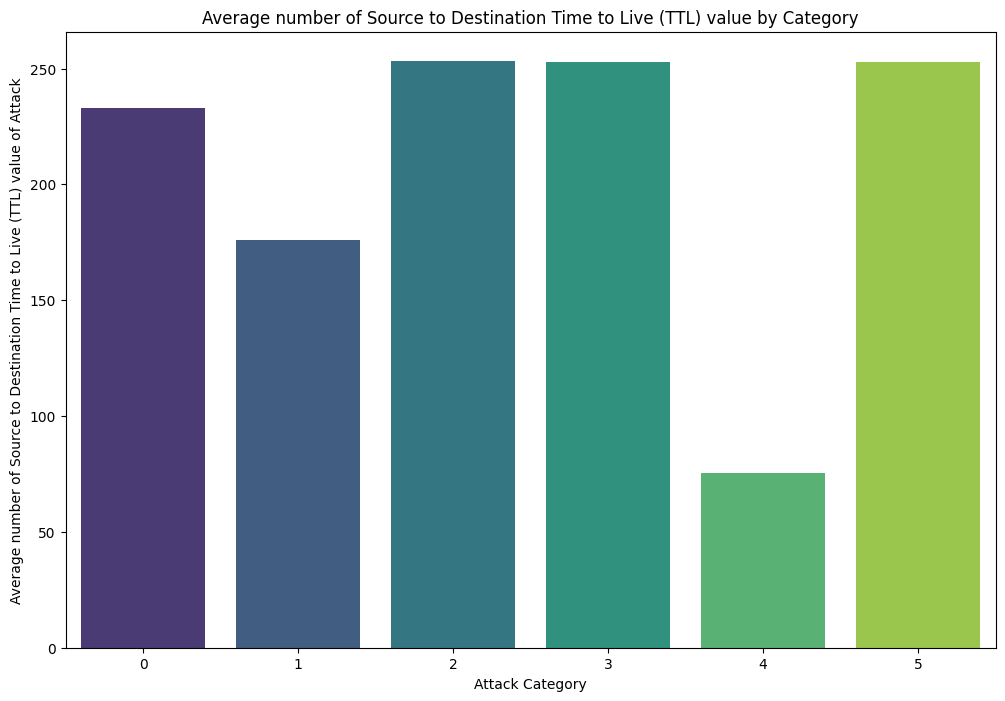

In [36]:
# Assuming 'train_filtered' is our DataFrame and 'attack_cat' and 'sttl' are columns in it
actual_sttl_avg_attack = train_filtered.groupby('attack_cat')['sttl'].mean().sort_values().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the average Source to Destination Time to Live (TTL) value of attacks for each attack category
sns.barplot(x='attack_cat', y='sttl', data=actual_sttl_avg_attack, palette='viridis')

# Set labels and title
plt.xlabel('Attack Category')
plt.ylabel('Average number of Source to Destination Time to Live (TTL) value of Attack')
plt.title('Average number of Source to Destination Time to Live (TTL) value by Category')

# Show the plot
plt.show()

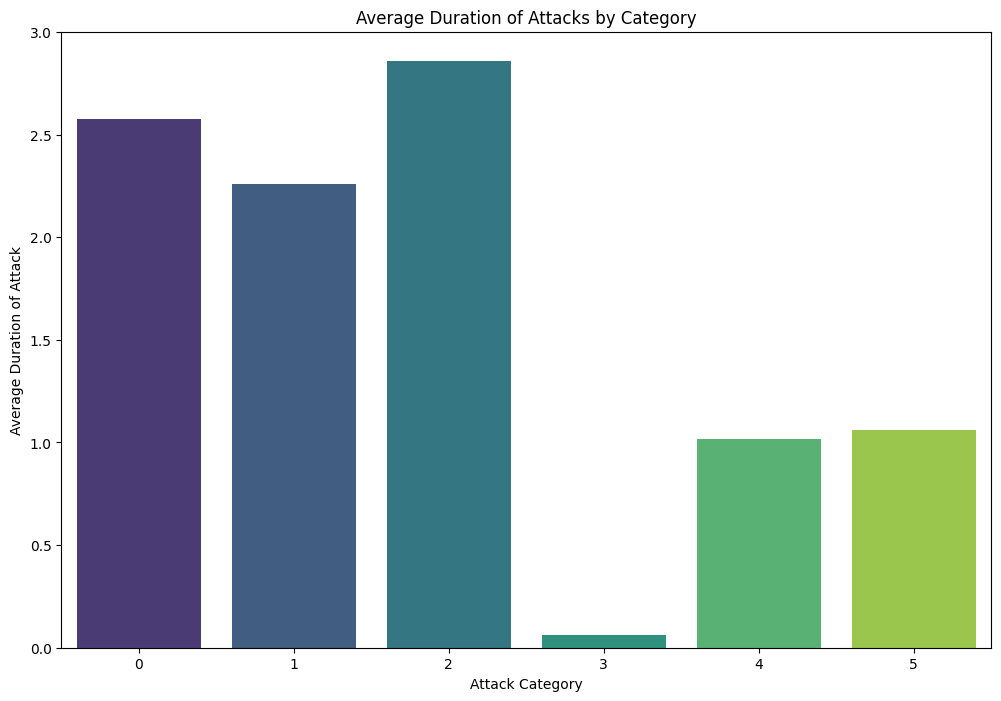

In [37]:
# Assuming 'train_filtered' is our DataFrame and 'attack_cat' and 'dur' are columns in it
actual_duration_avg_attack = train_filtered.groupby('attack_cat')['dur'].mean().sort_values().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the average duration of attacks for each attack category
sns.barplot(x='attack_cat', y='dur', data=actual_duration_avg_attack, palette='viridis')

# Set labels and title
plt.xlabel('Attack Category')
plt.ylabel('Average Duration of Attack')
plt.title('Average Duration of Attacks by Category')

# Show the plot
plt.show()

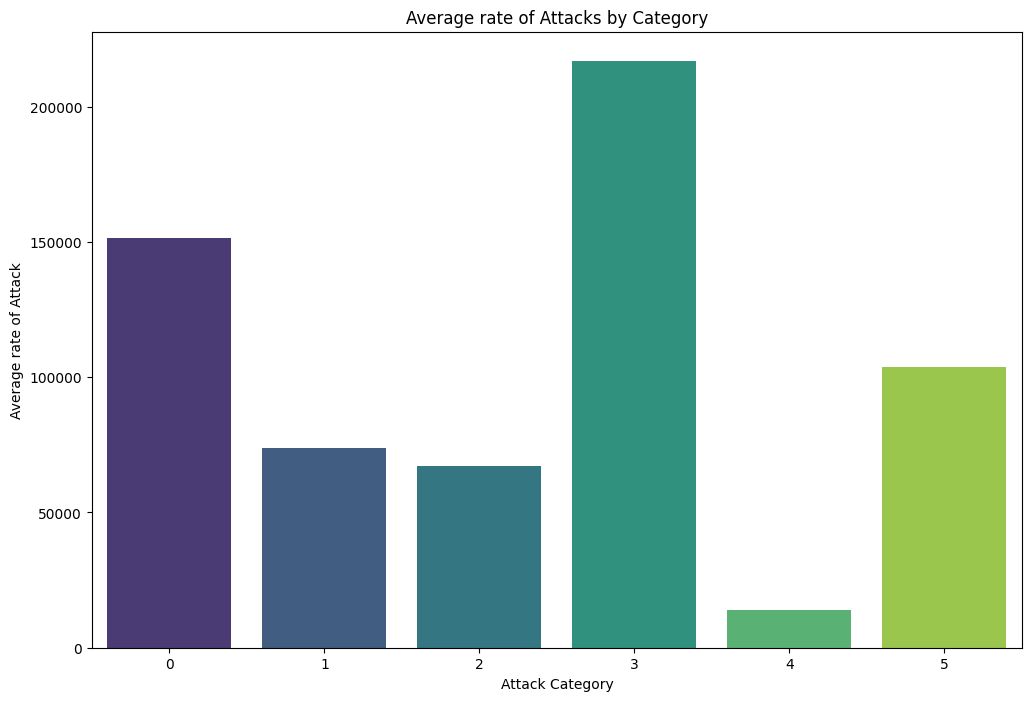

In [38]:
# Assuming 'train_filtered' is your DataFrame and 'attack_cat' and 'dur' are columns in it
actual_duration_avg_attack = train_filtered.groupby('attack_cat')['rate'].mean().sort_values().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plotting the average duration of attacks for each attack category
sns.barplot(x='attack_cat', y='rate', data=actual_duration_avg_attack, palette='viridis')

# Set labels and title
plt.xlabel('Attack Category')
plt.ylabel('Average rate of Attack')
plt.title('Average rate of Attacks by Category')

# Show the plot
plt.show()